In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
# For scikit-learn, you usually import specific components:
from sklearn.linear_model import LinearRegression
# etc.

# Load the dataset
bc_data = pd.read_csv('D:\CS Classes at GT\CS 7641 - ML\ASSIGNMENT - 3\Breast Cancer Wisconsin.csv')
print(bc_data.head())
print(bc_data.info())

         id diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0    842302         M        17.99         10.38          122.80     1001.0   
1    842517         M        20.57         17.77          132.90     1326.0   
2  84300903         M        19.69         21.25          130.00     1203.0   
3  84348301         M        11.42         20.38           77.58      386.1   
4  84358402         M        20.29         14.34          135.10     1297.0   

   smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
0          0.11840           0.27760          0.3001              0.14710   
1          0.08474           0.07864          0.0869              0.07017   
2          0.10960           0.15990          0.1974              0.12790   
3          0.14250           0.28390          0.2414              0.10520   
4          0.10030           0.13280          0.1980              0.10430   

   ...  texture_worst  perimeter_worst  area_worst  smoothness

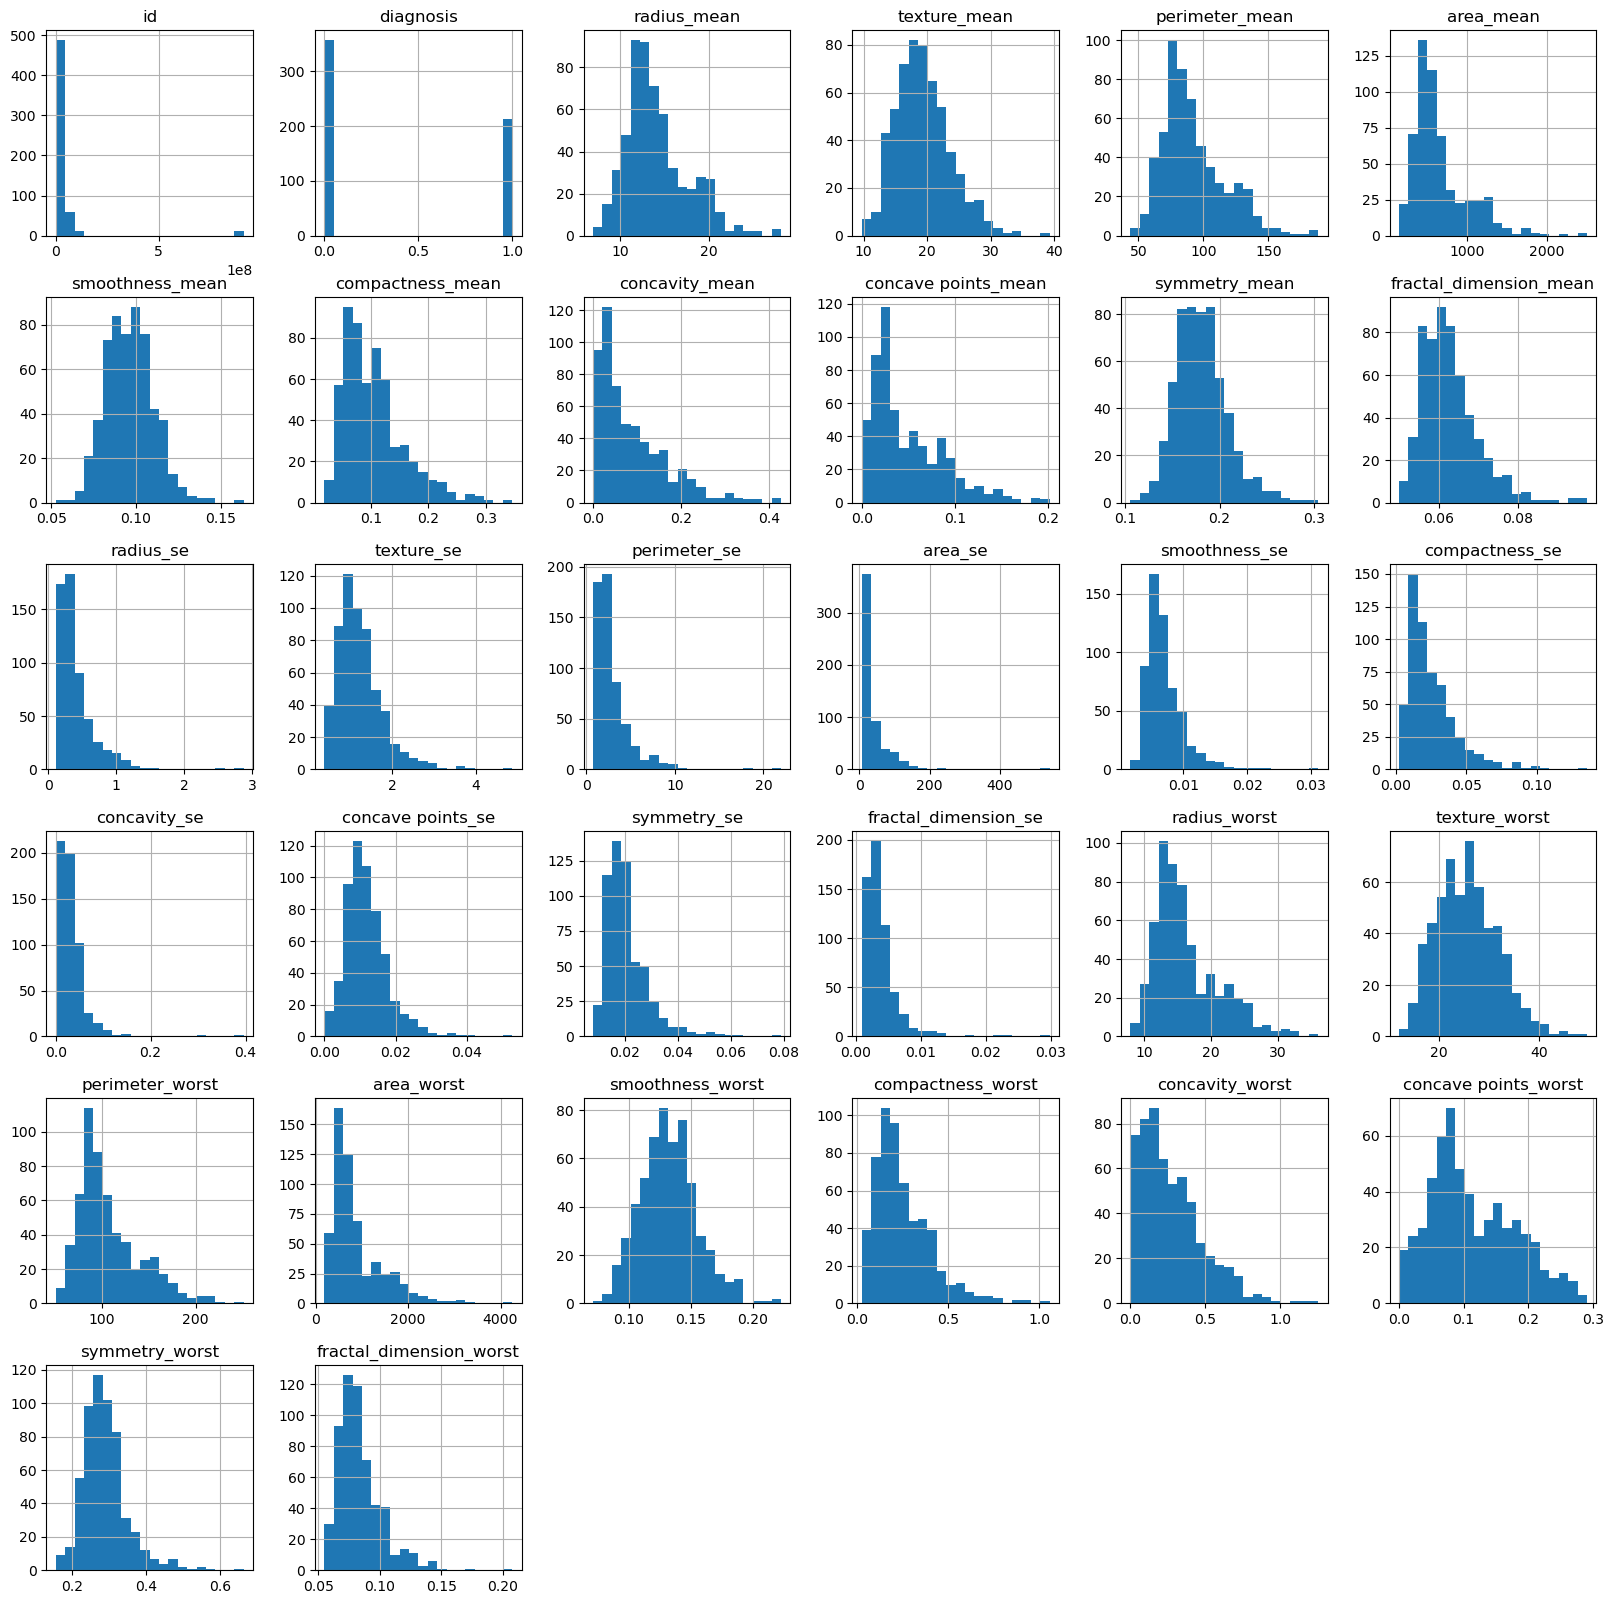

In [2]:
bc_data.drop('Unnamed: 32', axis=1, inplace=True)
bc_data['diagnosis'] = bc_data['diagnosis'].map({'M': 1, 'B': 0})
bc_data.hist(figsize=(20, 20), bins=20)
plt.show()


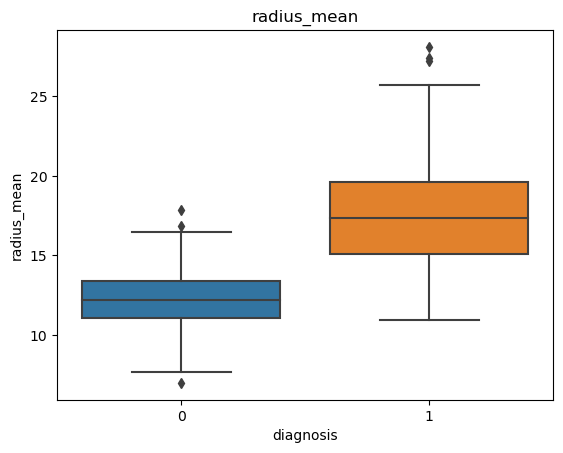

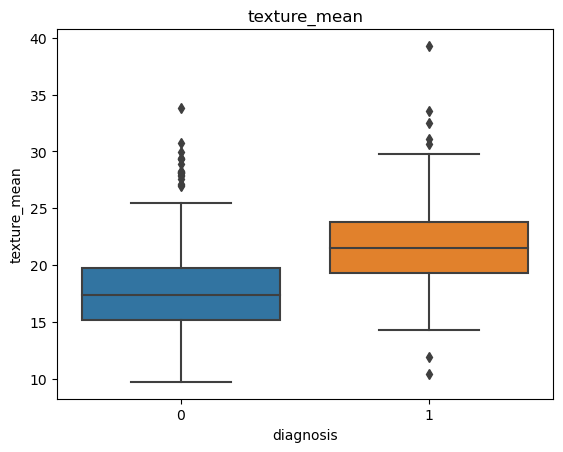

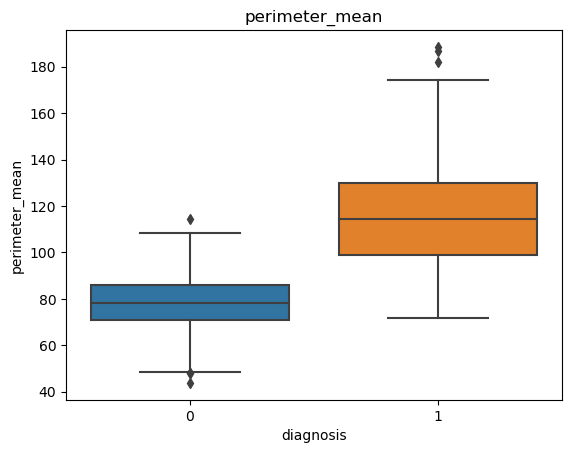

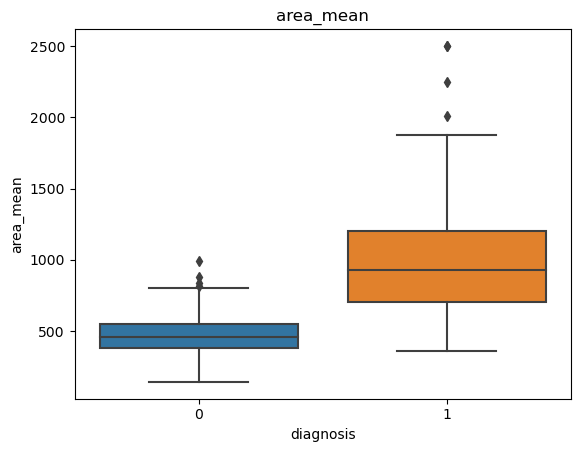

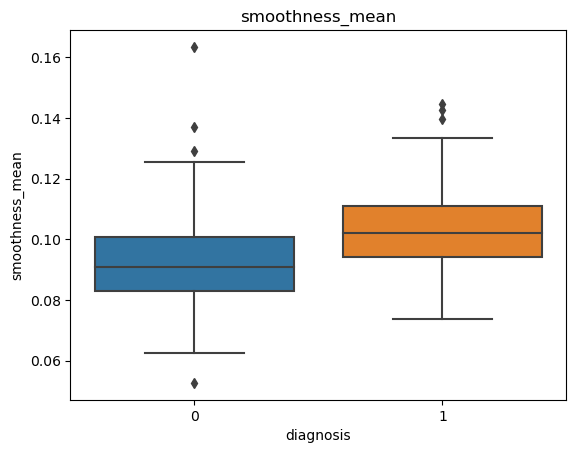

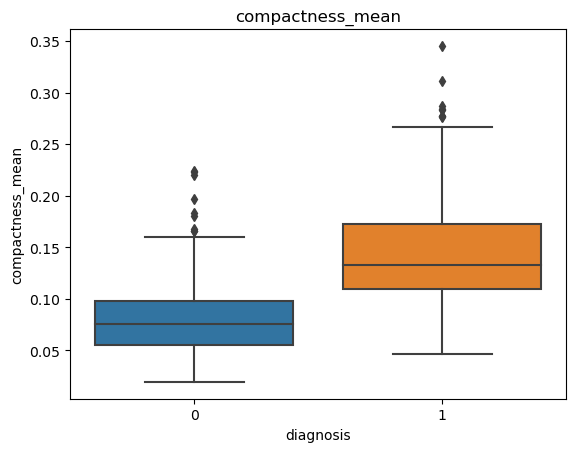

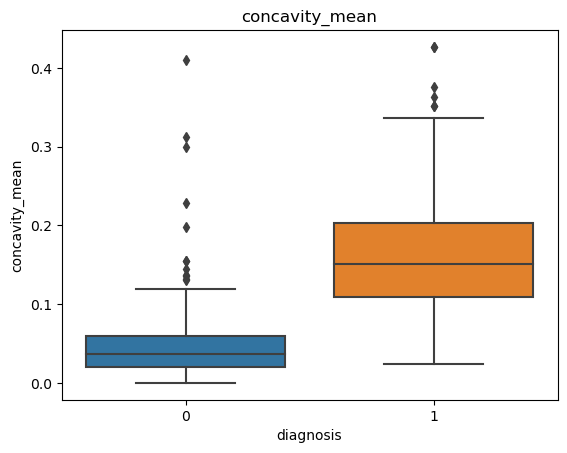

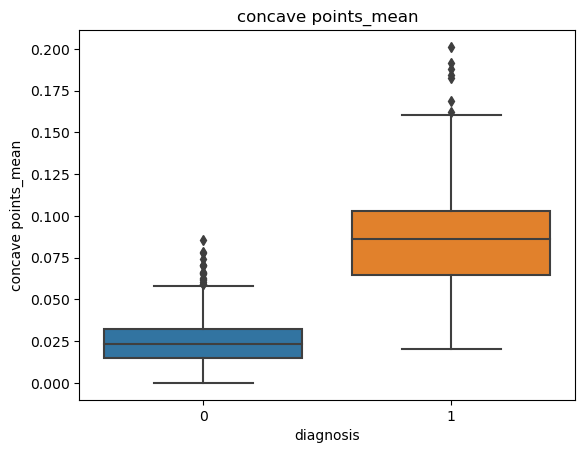

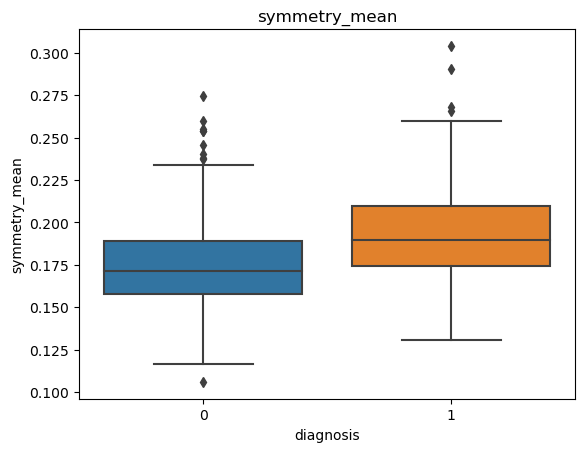

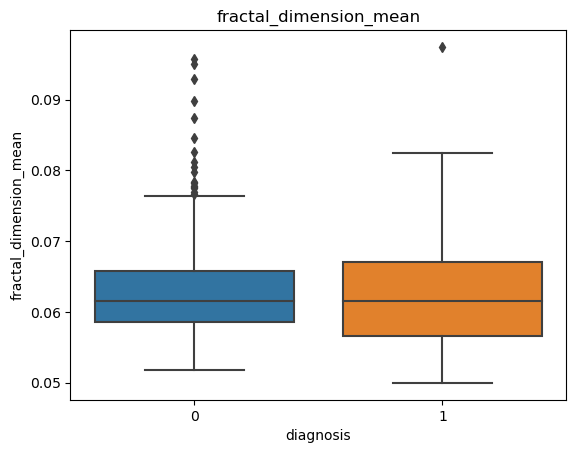

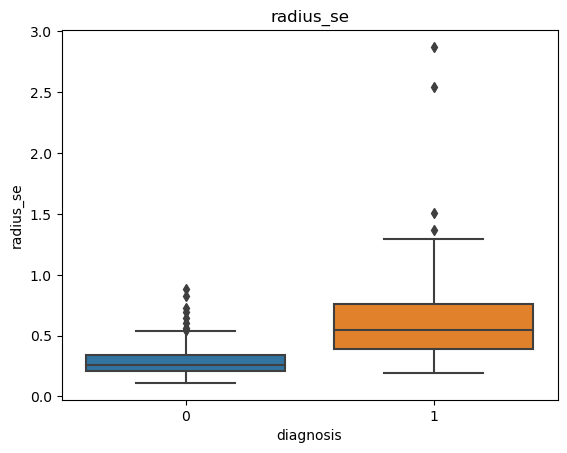

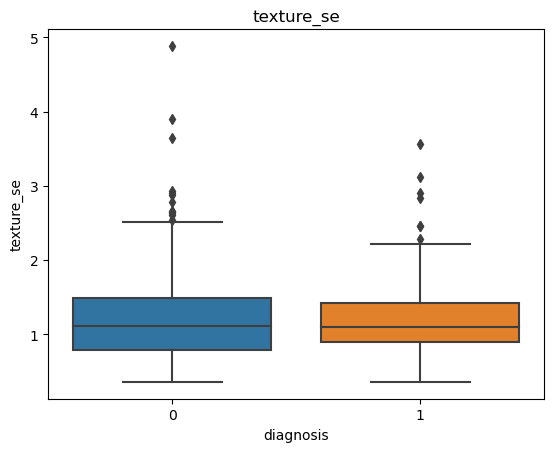

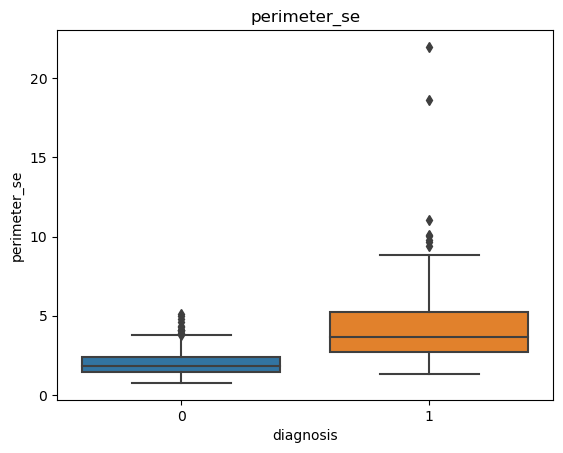

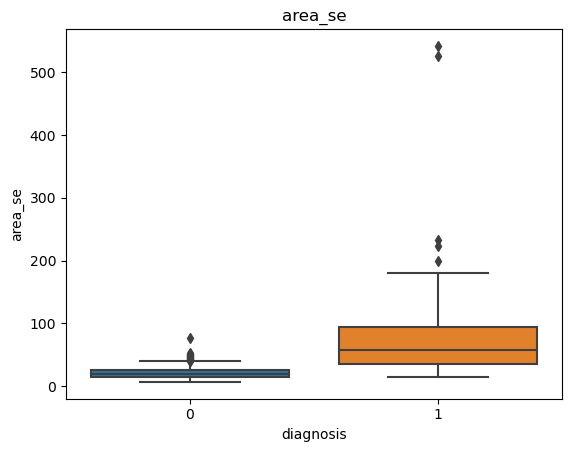

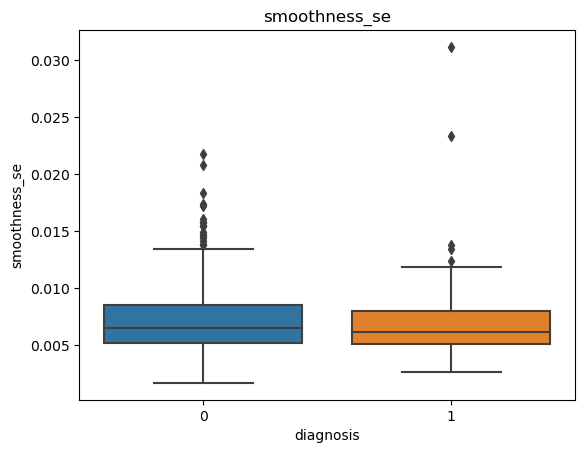

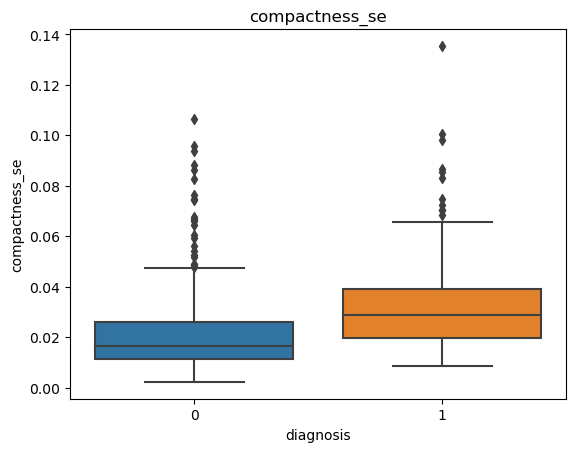

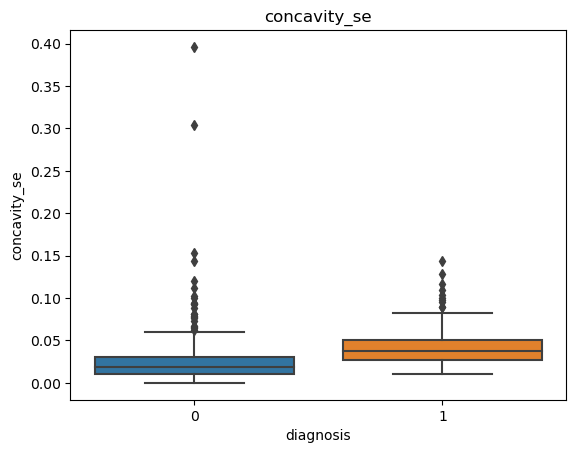

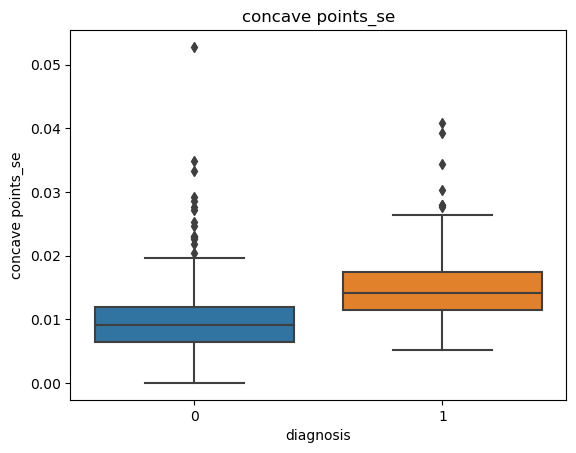

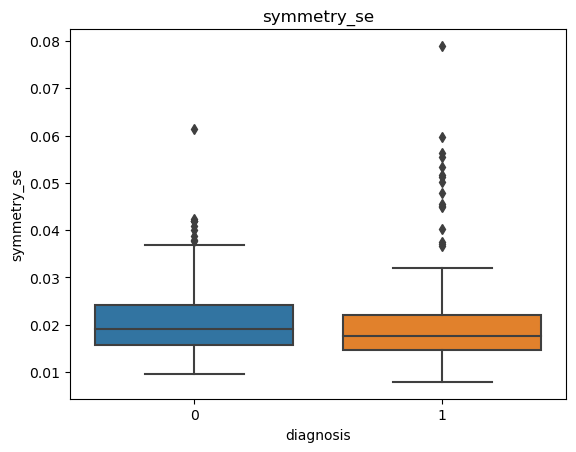

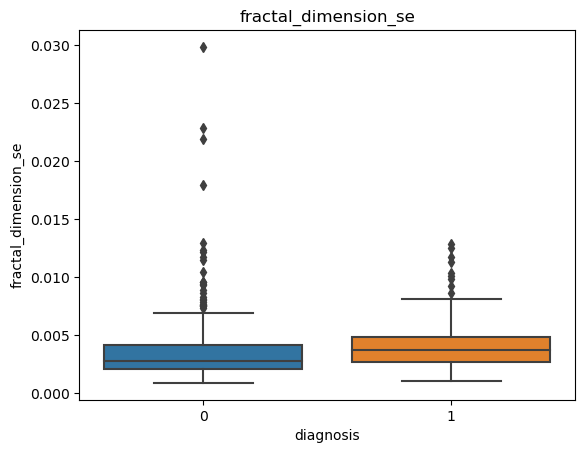

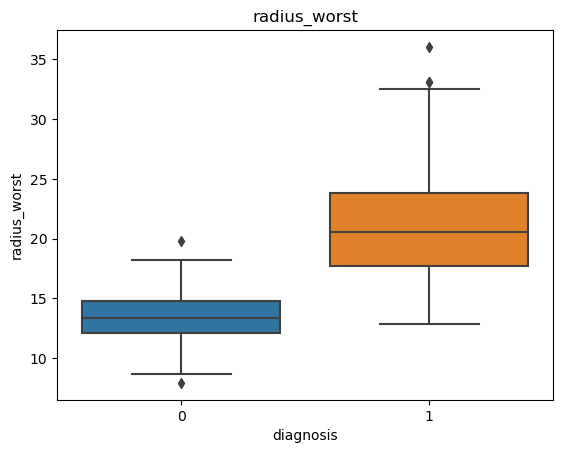

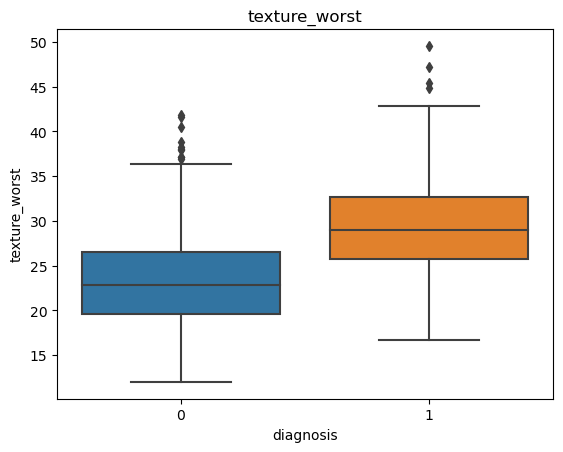

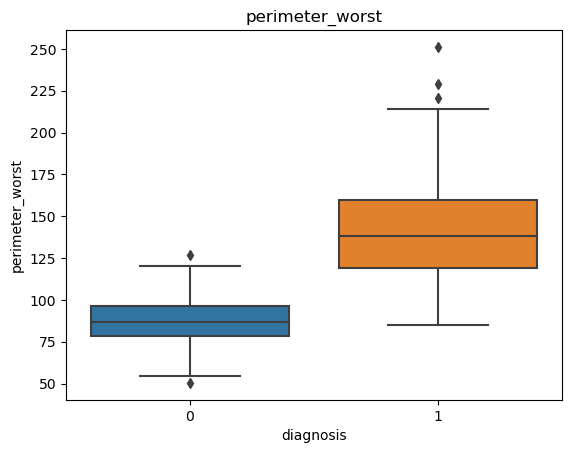

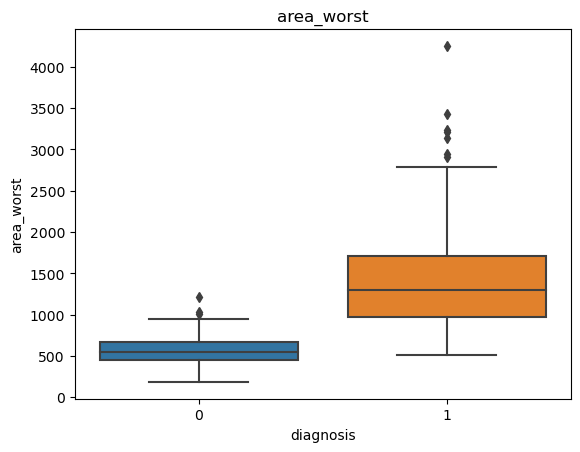

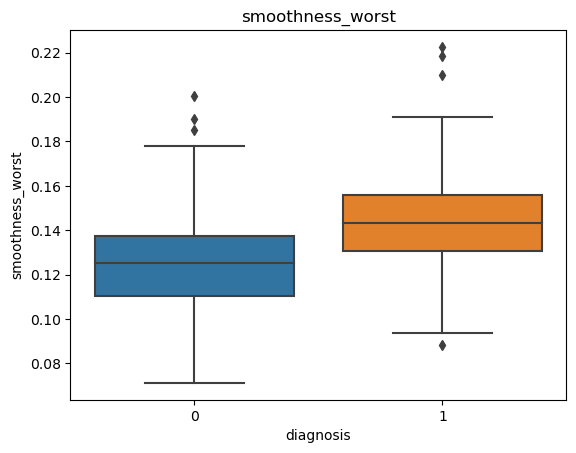

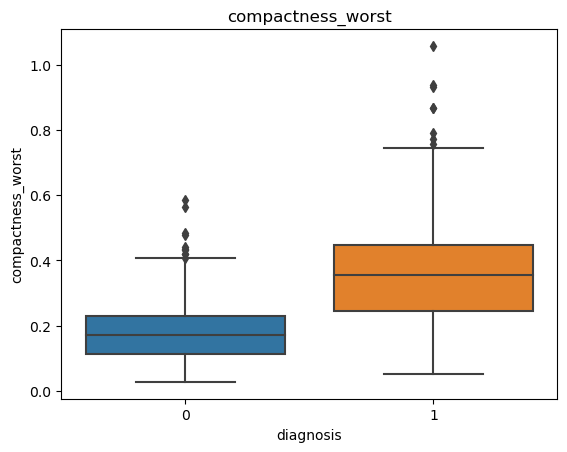

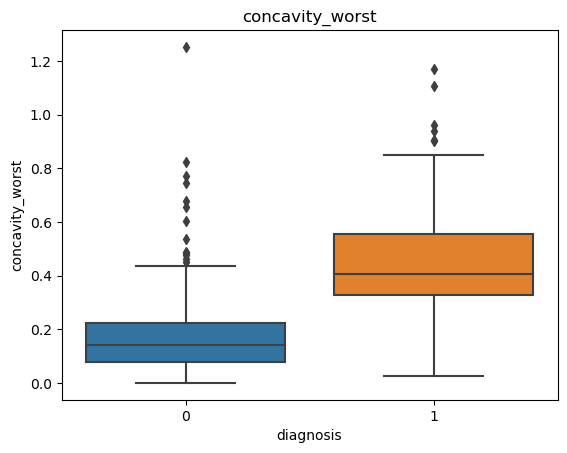

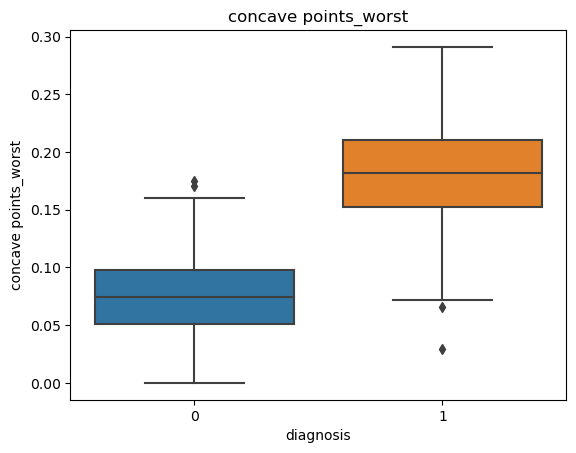

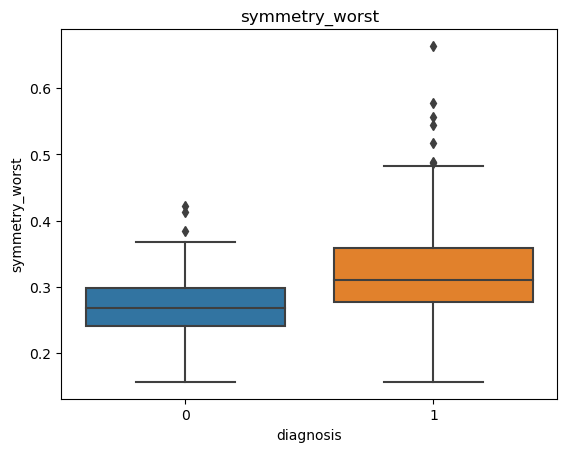

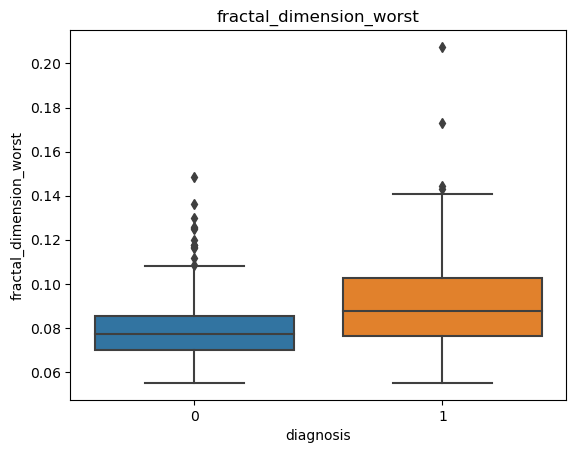

In [3]:
for column in bc_data.drop(['id', 'diagnosis'], axis=1).columns:
    sns.boxplot(x='diagnosis', y=column, data=bc_data)
    plt.title(column)
    plt.show()

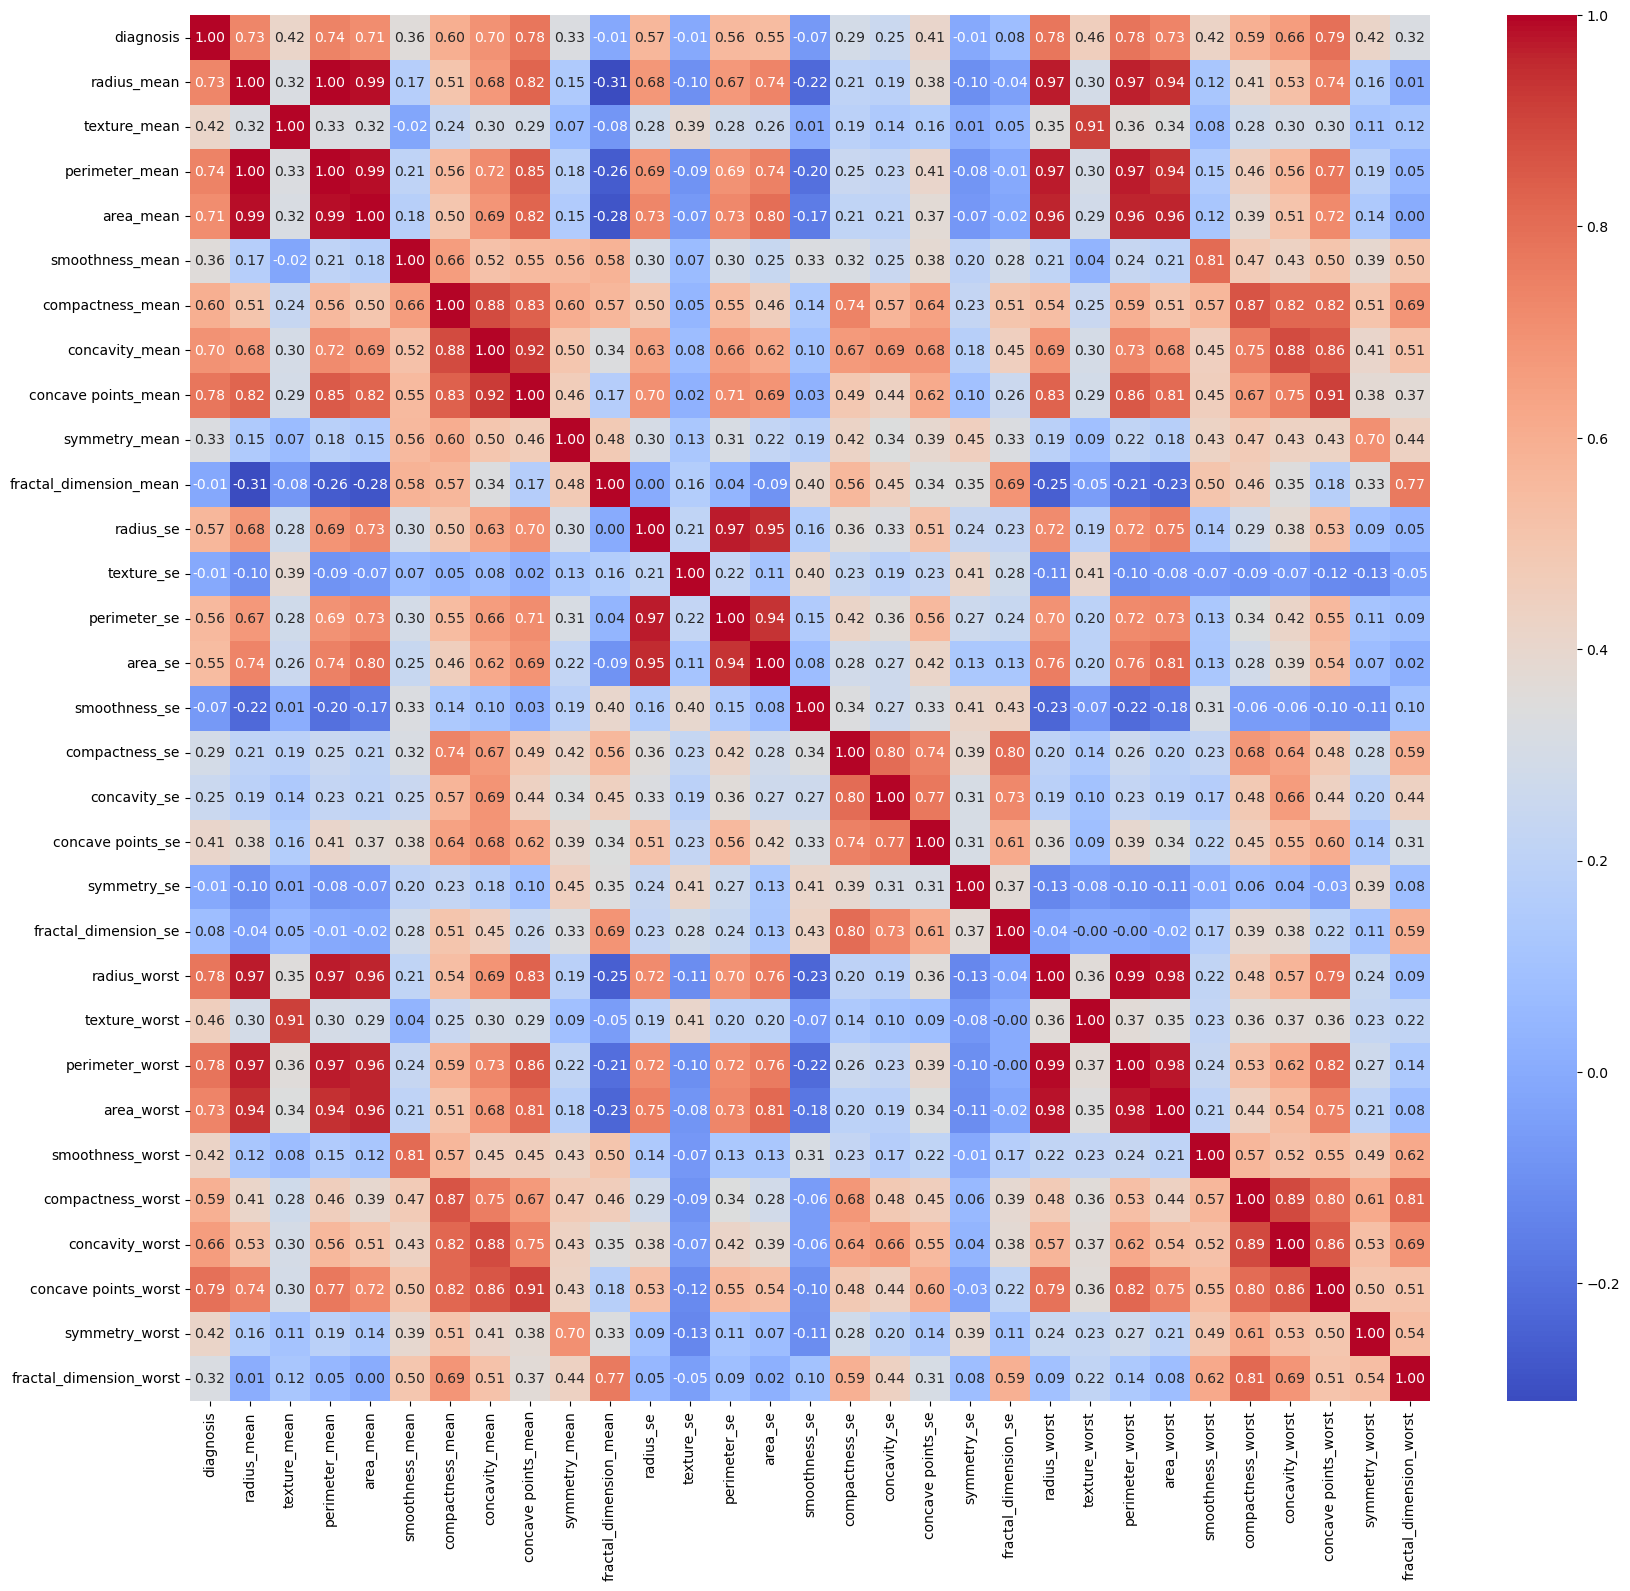

In [4]:

plt.figure(figsize=(20, 18))
sns.heatmap(bc_data.drop('id', axis=1).corr(), annot=True, fmt=".2f", cmap='coolwarm')
plt.show()


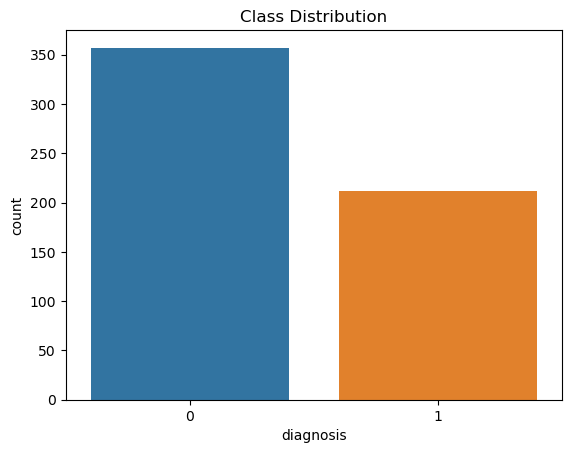

In [5]:
sns.countplot(x='diagnosis', data=bc_data)
plt.title('Class Distribution')
plt.show()


In [11]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder

# Feature Scaling
scaler = StandardScaler()
X_scaled = scaler.fit_transform(bc_data.drop('diagnosis', axis=1))

# Splitting the dataset into training and testing sets
y = bc_data['diagnosis']
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)
label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train)




In [12]:
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

# Load the dataset
bc_data = pd.read_csv('D:\CS Classes at GT\CS 7641 - ML\ASSIGNMENT - 3\Breast Cancer Wisconsin.csv')
bc_data.drop('Unnamed: 32', axis=1, inplace=True)
bc_data['diagnosis'] = bc_data['diagnosis'].map({'M': 1, 'B': 0})

# Feature Scaling
scaler = StandardScaler()
X_scaled = scaler.fit_transform(bc_data.drop('diagnosis', axis=1))
y = bc_data['diagnosis'].values

# Apply PCA with 10 components
pca_10 = PCA(n_components=10)
X_pca_10 = pca_10.fit_transform(X_scaled)

# Splitting the dataset into training and testing sets
X_train_pca, X_test_pca, y_train, y_test = train_test_split(X_pca_10, y, test_size=0.3, random_state=42)

# Create a DataFrame with the PCA components and diagnosis
columns = [f'Component_{i}' for i in range(1, 11)]
bc_data_pca = pd.DataFrame(X_pca_10, columns=columns)
bc_data_pca['diagnosis'] = y

bc_data_pca.to_csv('D:\CS Classes at GT\CS 7641 - ML\ASSIGNMENT - 3\Breast_Cancer_with_PCA_Components.csv', index=False)


Best parameters found:  {'activation': 'relu', 'hidden_layer_sizes': (50,), 'learning_rate_init': 0.001}


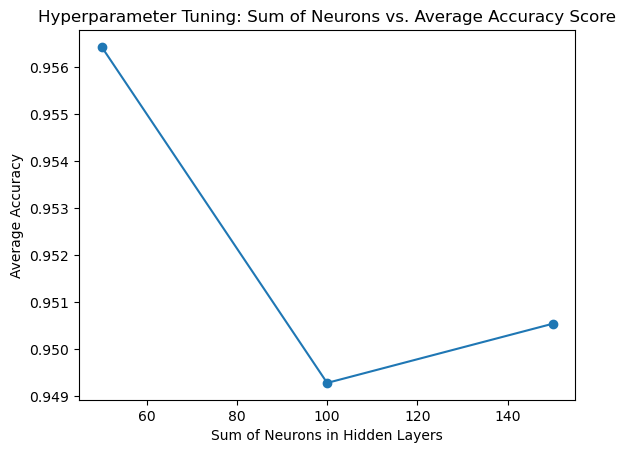

In [14]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import GridSearchCV
import numpy as np
import matplotlib.pyplot as plt

# Load the new dataset with PCA components
bc_data_with_pca = pd.read_csv('D:\\CS Classes at GT\\CS 7641 - ML\\ASSIGNMENT - 3\\Breast_Cancer_with_PCA_Components.csv')

# Feature Scaling
scaler = StandardScaler()
X_scaled = scaler.fit_transform(bc_data_with_pca.drop('diagnosis', axis=1))

# Splitting the dataset into training and testing sets
y = bc_data_with_pca['diagnosis']
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)

# Define a range of hyperparameters for the grid search
param_grid = {
    'hidden_layer_sizes': [(50,), (100,), (50, 50), (100, 50)],
    'activation': ['tanh', 'relu'],
    'learning_rate_init': [0.001, 0.01, 0.1],
}

# Initialize the MLPClassifier
mlp = MLPClassifier(max_iter=1000, random_state=42)

# Perform Grid Search
grid_search = GridSearchCV(estimator=mlp, param_grid=param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

# Print the best parameters
print("Best parameters found: ", grid_search.best_params_)

# Plotting the hyperparameter tuning results
# We'll use the sum of the sizes for simplicity (e.g., (50, 50) will be represented as 100)
size_representation = [sum(size) if isinstance(size, tuple) else size for size in param_grid['hidden_layer_sizes']]

# Create a mapping from size representation to mean scores
size_to_score = {sum(size): [] for size in param_grid['hidden_layer_sizes']}

# Populate the dictionary with mean test scores
for i, params in enumerate(grid_search.cv_results_['params']):
    size_sum = sum(params['hidden_layer_sizes']) if isinstance(params['hidden_layer_sizes'], tuple) else params['hidden_layer_sizes']
    size_to_score[size_sum].append(grid_search.cv_results_['mean_test_score'][i])

# Calculate the average score for each size sum
for size_sum in size_to_score:
    size_to_score[size_sum] = np.mean(size_to_score[size_sum])

# Sort the size representations for plotting
sorted_size_representation = sorted(size_to_score.keys())
sorted_scores = [size_to_score[size] for size in sorted_size_representation]

# Plotting the results
plt.plot(sorted_size_representation, sorted_scores, 'o-')
plt.xlabel('Sum of Neurons in Hidden Layers')
plt.ylabel('Average Accuracy')
plt.title('Hyperparameter Tuning: Sum of Neurons vs. Average Accuracy Score')
plt.show()


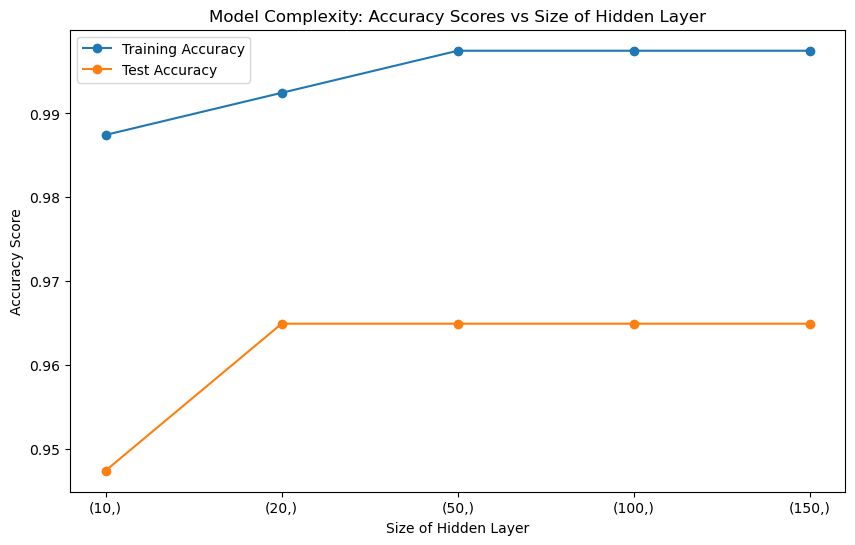

In [15]:
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

# Test different sizes of the hidden layer
hidden_layer_sizes = [(10,), (20,), (50,), (100,), (150,)]
train_scores = []
test_scores = []

for size in hidden_layer_sizes:
    mlp = MLPClassifier(hidden_layer_sizes=size, max_iter=1000, random_state=42)
    mlp.fit(X_train, y_train)
    
    train_preds = mlp.predict(X_train)
    test_preds = mlp.predict(X_test)
    
    train_scores.append(accuracy_score(y_train, train_preds))
    test_scores.append(accuracy_score(y_test, test_preds))

# Plotting the model complexity graph
plt.figure(figsize=(10, 6))
plt.plot([str(size) for size in hidden_layer_sizes], train_scores, 'o-', label='Training Accuracy')
plt.plot([str(size) for size in hidden_layer_sizes], test_scores, 'o-', label='Test Accuracy')
plt.xlabel('Size of Hidden Layer')
plt.ylabel('Accuracy Score')
plt.title('Model Complexity: Accuracy Scores vs Size of Hidden Layer')
plt.legend()
plt.show()


Iteration 100, Training Score: 0.9824046920821115, Validation Score: 0.9385964912280702
Iteration 200, Training Score: 0.9853372434017595, Validation Score: 0.956140350877193
Iteration 300, Training Score: 0.9912023460410557, Validation Score: 0.9473684210526315


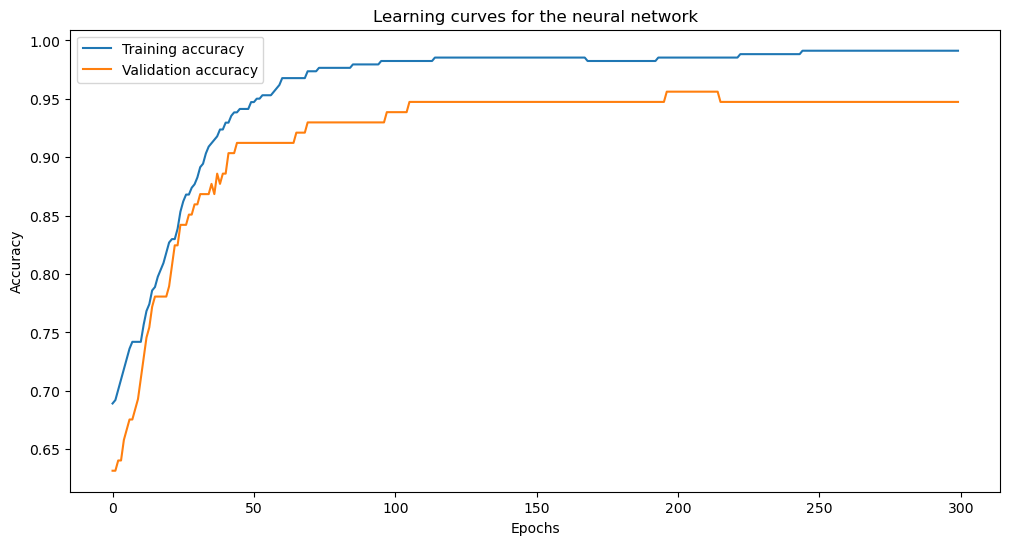

In [16]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPClassifier
import matplotlib.pyplot as plt

# Load the new dataset with PCA components
bc_data_with_pca = pd.read_csv('D:\\CS Classes at GT\\CS 7641 - ML\\ASSIGNMENT - 3\\Breast_Cancer_with_PCA_Components.csv')

# Feature Scaling
scaler = StandardScaler()
X_scaled = scaler.fit_transform(bc_data_with_pca.drop('diagnosis', axis=1))

# Split the dataset into training (60%), validation (20%), and testing sets (20%)
X_train, X_temp, y_train, y_temp = train_test_split(X_scaled, y, test_size=0.4, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

# Define the optimal hyperparameters
optimal_hyperparams = {
    'hidden_layer_sizes': (50,),
    'activation': 'relu',
    'learning_rate_init': 0.001
}

# Initialize the MLPClassifier with the optimal hyperparameters
mlp = MLPClassifier(max_iter=300, random_state=42, **optimal_hyperparams)

# List to store the scores
train_scores, val_scores = [], []

# Fit the model and collect the scores for each iteration
for i in range(1, 301):
    mlp.partial_fit(X_train, y_train, classes=np.unique(y))
    train_scores.append(mlp.score(X_train, y_train))
    val_scores.append(mlp.score(X_val, y_val))
    
    # Print out the scores every 100 iterations
    if i % 100 == 0:
        print(f"Iteration {i}, Training Score: {train_scores[-1]}, Validation Score: {val_scores[-1]}")

# Plotting the learning curves
plt.figure(figsize=(12, 6))
plt.plot(train_scores, label='Training accuracy')
plt.plot(val_scores, label='Validation accuracy')
plt.title('Learning curves for the neural network')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()


In [19]:
import pandas as pd
import numpy as np
import time
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import StandardScaler

# Load your dataset here
bc_data_with_pca = pd.read_csv('D:\\CS Classes at GT\\CS 7641 - ML\\ASSIGNMENT - 3\\Breast_Cancer_with_PCA_Components.csv')
X = bc_data_with_pca.drop('diagnosis', axis=1)
y = bc_data_with_pca['diagnosis'].values

# Feature Scaling
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Initialize lists for collecting data
training_sizes_line = []
training_times_line = []
testing_times_line = []

# Variables for collecting metrics at full training size
training_time_bar = None
testing_time_bar = None
accuracy_bar = None
precision_bar = None
recall_bar = None
f1_score_bar = None

# Define the best parameters from GridSearchCV or other hyperparameter tuning
best_params = {
    'hidden_layer_sizes': (50,),
    'activation': 'tanh',
    'learning_rate_init': 0.001
}

# Loop over training sizes from 10% to 90% in increments of 10%
for size in np.linspace(0.1, 0.9, 9):
    X_train_part, X_test_part, y_train_part, y_test_part = train_test_split(
        X_scaled, y, train_size=size, random_state=42
    )
    mlp = MLPClassifier(**best_params, random_state=42, max_iter=1000)
    
    # Training time
    start_time = time.perf_counter()
    mlp.fit(X_train_part, y_train_part)
    training_time = time.perf_counter() - start_time
    
    # Testing time (average over several runs for precision)
    start_time = time.perf_counter()
    for _ in range(10):  # Adjust as needed for precision
        y_pred = mlp.predict(X_test_part)
    testing_time = (time.perf_counter() - start_time) / 10
    
    training_sizes_line.append(size * 100)
    training_times_line.append(training_time)
    testing_times_line.append(testing_time)

# Full training size
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, train_size=None, random_state=42
)
mlp_full = MLPClassifier(**best_params, random_state=42, max_iter=1000)

# Training time
start_time = time.perf_counter()
mlp_full.fit(X_train, y_train)
training_time_bar = time.perf_counter() - start_time

# Testing time (average over several runs for precision)
start_time = time.perf_counter()
for _ in range(100):  # Adjust as needed for precision
    y_pred_full = mlp_full.predict(X_test)
testing_time_bar = (time.perf_counter() - start_time) / 100

# Calculate metrics
accuracy_bar = accuracy_score(y_test, y_pred_full)
precision_bar = precision_score(y_test, y_pred_full)
recall_bar = recall_score(y_test, y_pred_full)
f1_score_bar = f1_score(y_test, y_pred_full)

# Print metrics
print(f"Training Time (Full): {training_time_bar:.2f} seconds")
print(f"Testing Time (Full): {testing_time_bar:.2f} seconds")
print(f"Accuracy (Full): {accuracy_bar:.2f}")
print(f"Precision (Full): {precision_bar:.2f}")
print(f"Recall (Full): {recall_bar:.2f}")
print(f"F1 Score (Full): {f1_score_bar:.2f}")

# Create DataFrames
line_plot_df = pd.DataFrame({
    'Training Size (%)': training_sizes_line,
    'Training Time (s)': training_times_line,
    'Testing Time (s)': testing_times_line
})

bar_chart_df = pd.DataFrame({
    'Metric': ['Accuracy', 'Precision', 'Recall', 'F1 Score'],
    'Value': [accuracy_bar, precision_bar, recall_bar, f1_score_bar]
})

# Export to Excel
with pd.ExcelWriter('D:\\CS Classes at GT\\CS 7641 - ML\\ASSIGNMENT - 3\\mlp_performance_analysis-PCA.xlsx') as writer:
    line_plot_df.to_excel(writer, sheet_name='Line Plots Data', index=False)
    bar_chart_df.to_excel(writer, sheet_name='Bar Chart Data', index=False)


Training Time (Full): 0.31 seconds
Testing Time (Full): 0.00 seconds
Accuracy (Full): 0.97
Precision (Full): 0.98
Recall (Full): 0.94
F1 Score (Full): 0.96


In [28]:
from sklearn.decomposition import FastICA

# Assuming 'X_scaled' is your scaled feature set from the original dataset
ica = FastICA(n_components=10, random_state=42)
X_ica = ica.fit_transform(X_scaled)

# Select the components you're interested in (for all in this case)
selected_ica_df = pd.DataFrame(X_ica, columns=[f'ICA_Component_{i+1}' for i in range(10)])

# Add the diagnosis back into the DataFrame
selected_ica_df['diagnosis'] = bc_data['diagnosis'].values

# Save this new DataFrame to a CSV file
selected_ica_df.to_csv('D:\\CS Classes at GT\\CS 7641 - ML\\ASSIGNMENT - 3\\Breast_Cancer_with_ICA_Components.csv', index=False)


In [29]:
ica_data = pd.read_csv('D:\\CS Classes at GT\\CS 7641 - ML\\ASSIGNMENT - 3\\Breast_Cancer_with_ICA_Components.csv')

# Splitting the data
X = ica_data.drop('diagnosis', axis=1)
y = ica_data['diagnosis']
X_train_ica, X_test_ica, y_train_ica, y_test_ica = train_test_split(X, y, test_size=0.3, random_state=42)


In [30]:
from sklearn.neural_network import MLPClassifier

# Assuming you have found optimal parameters or you can define them as follows
mlp_ica = MLPClassifier(hidden_layer_sizes=(100, 50), activation='tanh', learning_rate_init=0.001, max_iter=1000, random_state=42)

mlp_ica.fit(X_train_ica, y_train_ica)

# Evaluate the model
y_pred_ica = mlp_ica.predict(X_test_ica)
print(f"Accuracy: {accuracy_score(y_test_ica, y_pred_ica)}")


Accuracy: 0.9707602339181286


Best parameters found:  {'activation': 'relu', 'hidden_layer_sizes': (100,), 'learning_rate_init': 0.1, 'solver': 'adam'}


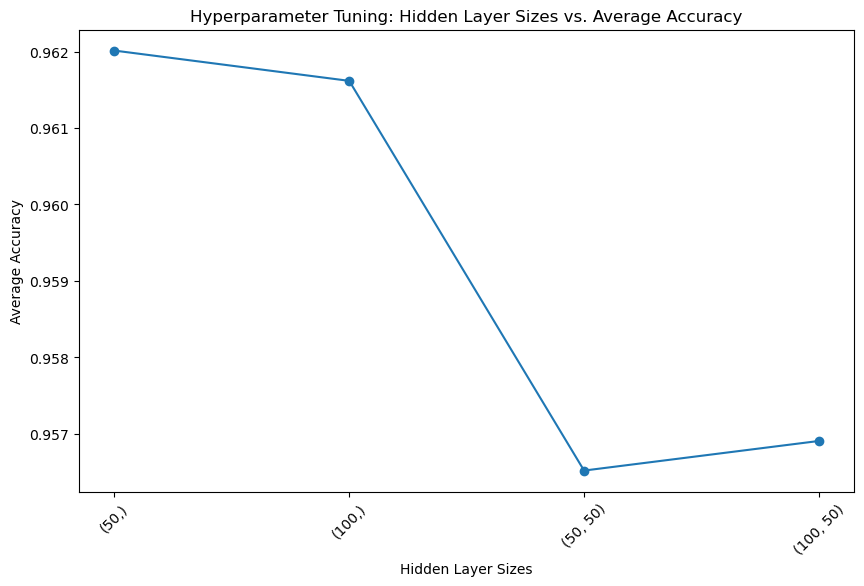

In [32]:
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import GridSearchCV

# Define a range of hyperparameters for the grid search
param_grid = {
    'hidden_layer_sizes': [(50,), (100,), (50, 50), (100, 50)],
    'activation': ['tanh', 'relu'],
    'solver': ['adam'],  # Adding the solver parameter if needed
    'learning_rate_init': [0.001, 0.01, 0.1],
}

# Initialize the MLPClassifier with a higher max_iter to ensure convergence
mlp = MLPClassifier(max_iter=1000, random_state=42)

# Perform Grid Search
grid_search = GridSearchCV(estimator=mlp, param_grid=param_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid_search.fit(X_train, y_train)

# Print the best parameters found by Grid Search
print("Best parameters found: ", grid_search.best_params_)

# Visualize hyperparameter tuning results
# Calculating average scores for each unique size of hidden layers
size_to_avg_score = {}
for size, score in zip(grid_search.cv_results_['param_hidden_layer_sizes'], grid_search.cv_results_['mean_test_score']):
    size = str(size)  # Convert tuple to string for consistent keys
    if size in size_to_avg_score:
        size_to_avg_score[size].append(score)
    else:
        size_to_avg_score[size] = [score]

# Calculating average for plotting
size_to_avg_score = {k: np.mean(v) for k, v in size_to_avg_score.items()}

# Plotting
sizes = list(size_to_avg_score.keys())
avg_scores = list(size_to_avg_score.values())

plt.figure(figsize=(10, 6))
plt.plot(sizes, avg_scores, marker='o')
plt.xlabel('Hidden Layer Sizes')
plt.ylabel('Average Accuracy')
plt.title('Hyperparameter Tuning: Hidden Layer Sizes vs. Average Accuracy')
plt.xticks(rotation=45)
plt.show()


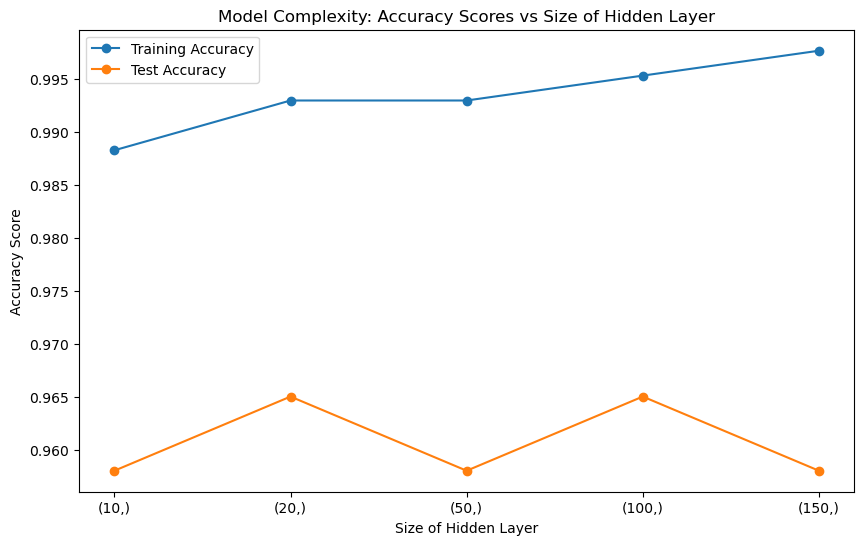

In [35]:
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

# Assuming X_train, X_test, y_train, y_test are already defined and preprocessed
# Also assuming that y_train and y_test are correctly formatted for sklearn (no need to call ravel())

# Test different sizes of the hidden layer
hidden_layer_sizes = [(10,), (20,), (50,), (100,), (150,)]
train_scores = []
test_scores = []

for size in hidden_layer_sizes:
    mlp = MLPClassifier(hidden_layer_sizes=size, max_iter=1000, random_state=42)
    mlp.fit(X_train, y_train)
    
    train_preds = mlp.predict(X_train)
    test_preds = mlp.predict(X_test)
    
    train_scores.append(accuracy_score(y_train, train_preds))
    test_scores.append(accuracy_score(y_test, test_preds))

# Plotting the model complexity graph
plt.figure(figsize=(10, 6))
plt.plot([str(size) for size in hidden_layer_sizes], train_scores, 'o-', label='Training Accuracy')
plt.plot([str(size) for size in hidden_layer_sizes], test_scores, 'o-', label='Test Accuracy')
plt.xlabel('Size of Hidden Layer')
plt.ylabel('Accuracy Score')
plt.title('Model Complexity: Accuracy Scores vs Size of Hidden Layer')
plt.legend()
plt.show()


Iteration 100, Training Score: 0.9853372434017595, Validation Score: 0.9736842105263158
Iteration 200, Training Score: 0.9882697947214076, Validation Score: 0.9736842105263158
Iteration 300, Training Score: 0.9941348973607038, Validation Score: 0.9736842105263158


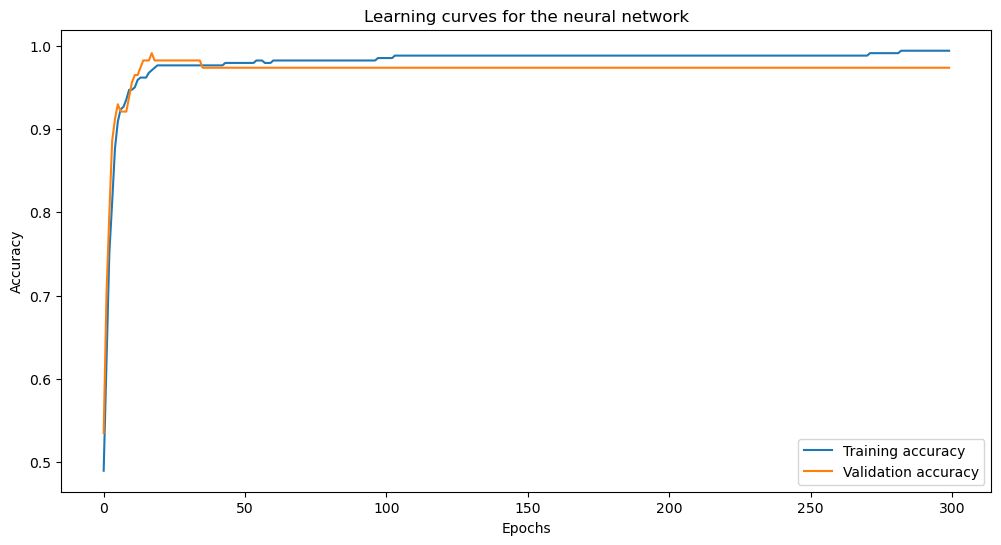

In [36]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPClassifier
import matplotlib.pyplot as plt

ica_data = pd.read_csv('D:\\CS Classes at GT\\CS 7641 - ML\\ASSIGNMENT - 3\\Breast_Cancer_with_ICA_Components.csv')

X = ica_data.drop('diagnosis', axis=1)
y = ica_data['diagnosis']

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split the dataset into training (60%), validation (20%), and testing sets (20%)
X_train, X_temp, y_train, y_temp = train_test_split(X_scaled, y, test_size=0.4, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

# Define the optimal hyperparameters
optimal_hyperparams = {
    'hidden_layer_sizes': (100, 50),
    'activation': 'tanh',
    'learning_rate_init': 0.001
}

# Initialize the MLPClassifier with the optimal hyperparameters
mlp = MLPClassifier(max_iter=300, random_state=42, **optimal_hyperparams)

# List to store the scores
train_scores, val_scores = [], []

# Fit the model and collect the scores for each iteration
for i in range(1, 301):
    mlp.partial_fit(X_train, y_train, classes=np.unique(y))
    train_scores.append(mlp.score(X_train, y_train))
    val_scores.append(mlp.score(X_val, y_val))
    
    # Print out the scores every 100 iterations
    if i % 100 == 0:
        print(f"Iteration {i}, Training Score: {train_scores[-1]}, Validation Score: {val_scores[-1]}")

# Plotting the learning curves
plt.figure(figsize=(12, 6))
plt.plot(train_scores, label='Training accuracy')
plt.plot(val_scores, label='Validation accuracy')
plt.title('Learning curves for the neural network')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()


In [39]:
import pandas as pd
import numpy as np
import time
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import StandardScaler

# Load your dataset here
ica_data = pd.read_csv('D:\\CS Classes at GT\\CS 7641 - ML\\ASSIGNMENT - 3\\Breast_Cancer_with_ICA_Components.csv')
X = bc_data.drop('diagnosis', axis=1)
y = bc_data['diagnosis'].values

# Feature Scaling
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Initialize lists for collecting data
training_sizes_line = []
training_times_line = []
testing_times_line = []

# Variables for collecting metrics at full training size
training_time_bar = None
testing_time_bar = None
accuracy_bar = None
precision_bar = None
recall_bar = None
f1_score_bar = None

# Define the best parameters from GridSearchCV or other hyperparameter tuning
best_params = {
    'hidden_layer_sizes': (50,),
    'activation': 'tanh',
    'learning_rate_init': 0.001
}

# Loop over training sizes from 10% to 90% in increments of 10%
for size in np.linspace(0.1, 0.9, 9):
    X_train_part, X_test_part, y_train_part, y_test_part = train_test_split(
        X_scaled, y, train_size=size, random_state=42
    )
    mlp = MLPClassifier(**best_params, random_state=42, max_iter=1000)
    
    # Training time
    start_time = time.perf_counter()
    mlp.fit(X_train_part, y_train_part)
    training_time = time.perf_counter() - start_time
    
    # Testing time (average over several runs for precision)
    start_time = time.perf_counter()
    for _ in range(10):  # Adjust as needed for precision
        y_pred = mlp.predict(X_test_part)
    testing_time = (time.perf_counter() - start_time) / 10
    
    training_sizes_line.append(size * 100)
    training_times_line.append(training_time)
    testing_times_line.append(testing_time)

# Full training size
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, train_size=None, random_state=42
)
mlp_full = MLPClassifier(**best_params, random_state=42, max_iter=1000)

# Training time
start_time = time.perf_counter()
mlp_full.fit(X_train, y_train)
training_time_bar = time.perf_counter() - start_time

# Testing time (average over several runs for precision)
start_time = time.perf_counter()
for _ in range(100):  # Adjust as needed for precision
    y_pred_full = mlp_full.predict(X_test)
testing_time_bar = (time.perf_counter() - start_time) / 100

# Calculate metrics
accuracy_bar = accuracy_score(y_test, y_pred_full)
precision_bar = precision_score(y_test, y_pred_full)
recall_bar = recall_score(y_test, y_pred_full)
f1_score_bar = f1_score(y_test, y_pred_full)

# Print metrics
print(f"Training Time (Full): {training_time_bar:.2f} seconds")
print(f"Testing Time (Full): {testing_time_bar:.2f} seconds")
print(f"Accuracy (Full): {accuracy_bar:.2f}")
print(f"Precision (Full): {precision_bar:.2f}")
print(f"Recall (Full): {recall_bar:.2f}")
print(f"F1 Score (Full): {f1_score_bar:.2f}")

# Create DataFrames
line_plot_df = pd.DataFrame({
    'Training Size (%)': training_sizes_line,
    'Training Time (s)': training_times_line,
    'Testing Time (s)': testing_times_line
})

bar_chart_df = pd.DataFrame({
    'Metric': ['Accuracy', 'Precision', 'Recall', 'F1 Score'],
    'Value': [accuracy_bar, precision_bar, recall_bar, f1_score_bar]
})

# Export to Excel
with pd.ExcelWriter('D:\\CS Classes at GT\\CS 7641 - ML\\ASSIGNMENT - 3\\mlp_performance_analysis-ICA.xlsx') as writer:
    line_plot_df.to_excel(writer, sheet_name='Line Plots Data', index=False)
    bar_chart_df.to_excel(writer, sheet_name='Bar Chart Data', index=False)


Training Time (Full): 0.45 seconds
Testing Time (Full): 0.00 seconds
Accuracy (Full): 0.99
Precision (Full): 0.98
Recall (Full): 0.98
F1 Score (Full): 0.98


In [47]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.random_projection import GaussianRandomProjection

# Load the dataset
bc_data = pd.read_csv('D:\\CS Classes at GT\\CS 7641 - ML\\ASSIGNMENT - 3\\Breast Cancer Wisconsin.csv')

# Preprocess the dataset: drop 'id' and 'Unnamed: 32', encode 'diagnosis'
bc_data.drop(['id', 'Unnamed: 32'], axis=1, inplace=True)
bc_data['diagnosis'] = bc_data['diagnosis'].map({'M': 1, 'B': 0})

# Separate features and target
X = bc_data.drop('diagnosis', axis=1)
y = bc_data['diagnosis']

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Apply Gaussian Random Projection
grp = GaussianRandomProjection(n_components=10, random_state=42)  # Adjust 'n_components' as needed
X_reduced = grp.fit_transform(X_scaled)

# Convert the reduced dataset back to a DataFrame
reduced_data = pd.DataFrame(X_reduced, columns=[f'Component_{i+1}' for i in range(X_reduced.shape[1])])
reduced_data['diagnosis'] = y

# Save the reduced dataset to a new CSV file
reduced_data.to_csv('D:\\CS Classes at GT\\CS 7641 - ML\\ASSIGNMENT - 3\\Breast_Cancer_Reduced_GRP.csv', index=False)

print("Reduced dataset saved successfully.")


Reduced dataset saved successfully.


Best parameters found:  {'activation': 'relu', 'hidden_layer_sizes': (50,), 'learning_rate_init': 0.001, 'solver': 'adam'}


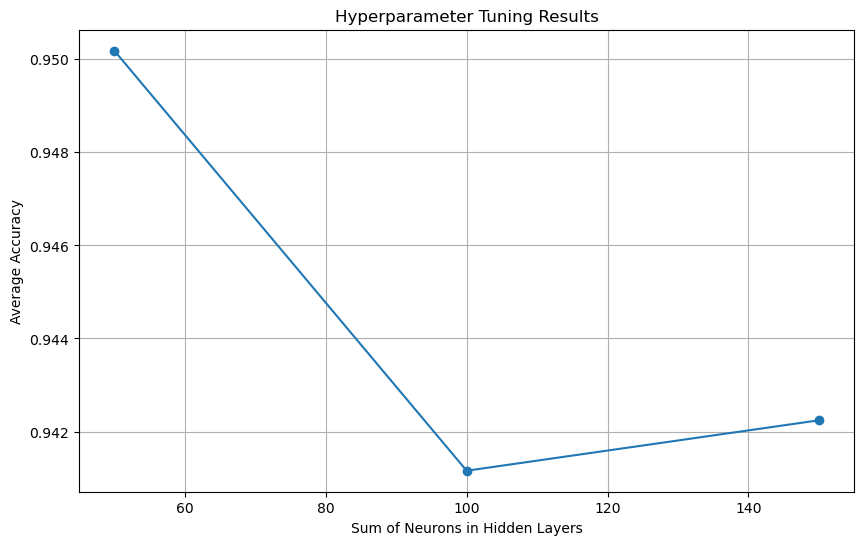

In [49]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import GridSearchCV
import numpy as np
import matplotlib.pyplot as plt

# Load the reduced dataset
bc_data_reduced = pd.read_csv('D:\\CS Classes at GT\\CS 7641 - ML\\ASSIGNMENT - 3\\Breast_Cancer_Reduced_GRP.csv')

# Feature Scaling
scaler = StandardScaler()
X_scaled = scaler.fit_transform(bc_data_reduced.drop('diagnosis', axis=1))

# Splitting the dataset into training and testing sets
y = bc_data_reduced['diagnosis']
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)

# Define a range of hyperparameters for the grid search
param_grid = {
    'hidden_layer_sizes': [(50,), (100,), (50, 50), (100, 50)],
    'activation': ['tanh', 'relu'],
    'solver': ['adam'],  # Added for completeness
    'learning_rate_init': [0.001, 0.01, 0.1],
}

# Initialize the MLPClassifier
mlp = MLPClassifier(max_iter=1000, random_state=42)

# Perform Grid Search
grid_search = GridSearchCV(estimator=mlp, param_grid=param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

# Print the best parameters
print("Best parameters found: ", grid_search.best_params_)

# Plotting the hyperparameter tuning results
size_representation = [sum(size) if isinstance(size, tuple) else size for size in param_grid['hidden_layer_sizes']]
size_to_score = {sum(size): [] for size in param_grid['hidden_layer_sizes']}

for i, params in enumerate(grid_search.cv_results_['params']):
    size = sum(params['hidden_layer_sizes']) if isinstance(params['hidden_layer_sizes'], tuple) else params['hidden_layer_sizes']
    size_to_score[size].append(grid_search.cv_results_['mean_test_score'][i])

for size in size_to_score:
    size_to_score[size] = np.mean(size_to_score[size])

sorted_sizes = sorted(size_to_score.keys())
sorted_scores = [size_to_score[size] for size in sorted_sizes]

plt.figure(figsize=(10, 6))
plt.plot(sorted_sizes, sorted_scores, marker='o')
plt.xlabel('Sum of Neurons in Hidden Layers')
plt.ylabel('Average Accuracy')
plt.title('Hyperparameter Tuning Results')
plt.grid(True)
plt.show()


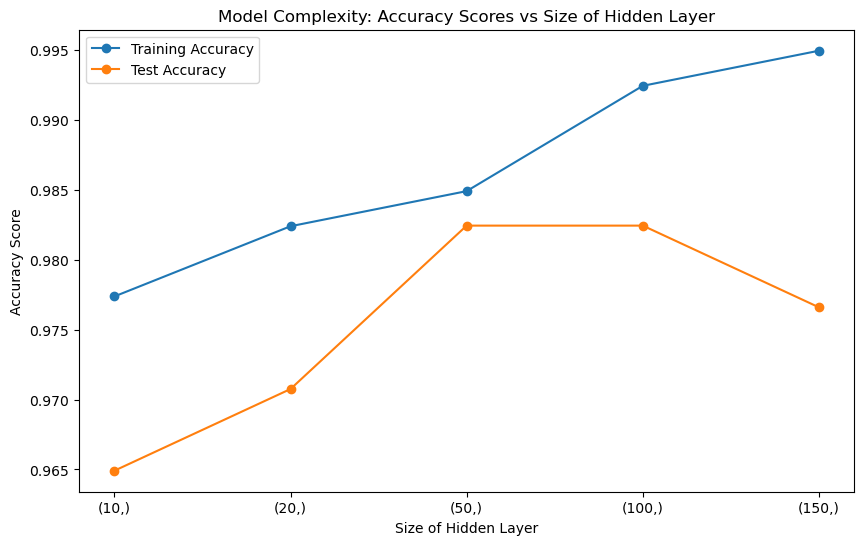

In [50]:
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

# Load the reduced dataset
bc_data_reduced = pd.read_csv('D:\\CS Classes at GT\\CS 7641 - ML\\ASSIGNMENT - 3\\Breast_Cancer_Reduced_GRP.csv')

# Feature Scaling
scaler = StandardScaler()
X_scaled = scaler.fit_transform(bc_data_reduced.drop('diagnosis', axis=1))

# Splitting the dataset into training and testing sets
y = bc_data_reduced['diagnosis'].values
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)

# Test different sizes of the hidden layer
hidden_layer_sizes = [(10,), (20,), (50,), (100,), (150,)]
train_scores = []
test_scores = []

for size in hidden_layer_sizes:
    mlp = MLPClassifier(hidden_layer_sizes=size, max_iter=1000, random_state=42)
    mlp.fit(X_train, y_train)
    
    train_preds = mlp.predict(X_train)
    test_preds = mlp.predict(X_test)
    
    train_scores.append(accuracy_score(y_train, train_preds))
    test_scores.append(accuracy_score(y_test, test_preds))

# Plotting the model complexity graph
plt.figure(figsize=(10, 6))
plt.plot([str(size) for size in hidden_layer_sizes], train_scores, 'o-', label='Training Accuracy')
plt.plot([str(size) for size in hidden_layer_sizes], test_scores, 'o-', label='Test Accuracy')
plt.xlabel('Size of Hidden Layer')
plt.ylabel('Accuracy Score')
plt.title('Model Complexity: Accuracy Scores vs Size of Hidden Layer')
plt.legend()
plt.show()


Iteration 100, Training Score: 0.9472140762463344, Validation Score: 0.9298245614035088
Iteration 200, Training Score: 0.9589442815249267, Validation Score: 0.9298245614035088
Iteration 300, Training Score: 0.9736070381231672, Validation Score: 0.9473684210526315


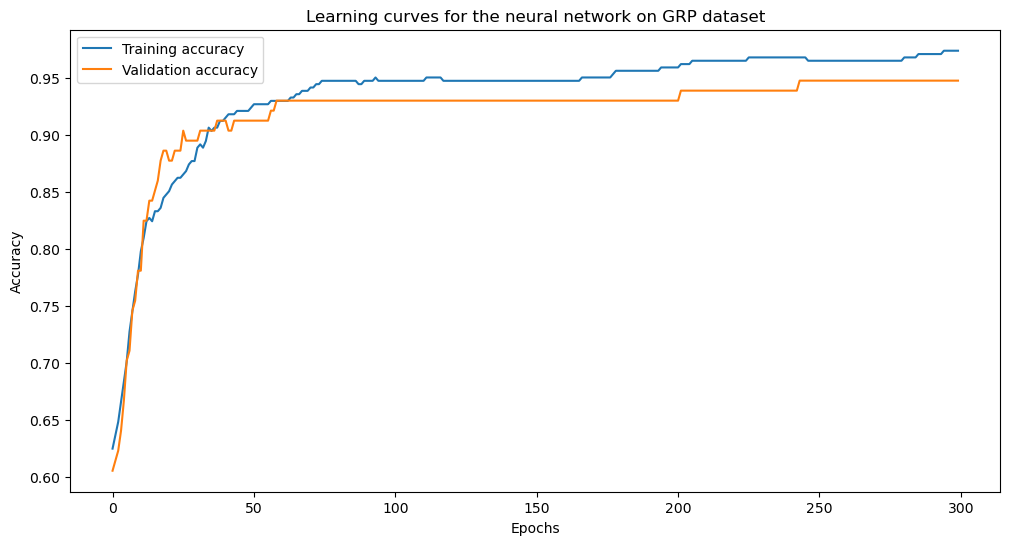

In [51]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPClassifier
import matplotlib.pyplot as plt
import numpy as np

# Load the GRP dataset
grp_data = pd.read_csv('D:\\CS Classes at GT\\CS 7641 - ML\\ASSIGNMENT - 3\\Breast_Cancer_Reduced_GRP.csv')


X = grp_data.drop('diagnosis', axis=1)
y = grp_data['diagnosis']

# Standardize features by removing the mean and scaling to unit variance
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split the dataset into training (60%), validation (20%), and testing sets (20%)
X_train, X_temp, y_train, y_temp = train_test_split(X_scaled, y, test_size=0.4, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

# Define the optimal hyperparameters
optimal_hyperparams = {
    'hidden_layer_sizes': (50,),
    'activation': 'relu',
    'learning_rate_init': 0.001
}

# Initialize the MLPClassifier with the optimal hyperparameters
mlp = MLPClassifier(max_iter=300, random_state=42, **optimal_hyperparams)

# List to store the scores
train_scores, val_scores = [], []

# Fit the model and collect the scores for each iteration
for i in range(1, 301):
    mlp.partial_fit(X_train, y_train, classes=np.unique(y))
    train_scores.append(mlp.score(X_train, y_train))
    val_scores.append(mlp.score(X_val, y_val))
    
    # Print out the scores every 100 iterations
    if i % 100 == 0:
        print(f"Iteration {i}, Training Score: {train_scores[-1]}, Validation Score: {val_scores[-1]}")

# Plotting the learning curves
plt.figure(figsize=(12, 6))
plt.plot(train_scores, label='Training accuracy')
plt.plot(val_scores, label='Validation accuracy')
plt.title('Learning curves for the neural network on GRP dataset')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()


In [52]:
import pandas as pd
import numpy as np
import time
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import StandardScaler

# Load your dataset here
grp_data = pd.read_csv('D:\\CS Classes at GT\\CS 7641 - ML\\ASSIGNMENT - 3\\Breast_Cancer_Reduced_GRP.csv')

# Assuming 'X' and 'y' columns are properly named in your reduced dataset
X = grp_data.drop('diagnosis', axis=1)
y = grp_data['diagnosis'].values

# Feature Scaling
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Initialize lists for collecting data
training_sizes_line = []
training_times_line = []
testing_times_line = []

# Variables for collecting metrics at full training size
training_time_bar = None
testing_time_bar = None
accuracy_bar = None
precision_bar = None
recall_bar = None
f1_score_bar = None

# Define the best parameters from previous experiments or use these as starting parameters
best_params = {
    'hidden_layer_sizes': (50,),
    'activation': 'relu',
    'solver': 'adam',
    'learning_rate_init': 0.001
}

# Loop over training sizes from 10% to 90% in increments of 10%
for size in np.linspace(0.1, 0.9, 9):
    X_train_part, X_test_part, y_train_part, y_test_part = train_test_split(
        X_scaled, y, train_size=size, random_state=42
    )
    mlp = MLPClassifier(**best_params, random_state=42, max_iter=1000)
    
    # Training time
    start_time = time.perf_counter()
    mlp.fit(X_train_part, y_train_part)
    training_time = time.perf_counter() - start_time
    
    # Testing time (average over several runs for precision)
    start_time = time.perf_counter()
    for _ in range(10):
        y_pred = mlp.predict(X_test_part)
    testing_time = (time.perf_counter() - start_time) / 10
    
    training_sizes_line.append(size * 100)
    training_times_line.append(training_time)
    testing_times_line.append(testing_time)

# Full training size
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, train_size=0.9, random_state=42  # Correction: train_size should be less than 1
)
mlp_full = MLPClassifier(**best_params, random_state=42, max_iter=1000)

# Training time
start_time = time.perf_counter()
mlp_full.fit(X_train, y_train)
training_time_bar = time.perf_counter() - start_time

# Testing time (average over several runs for precision)
start_time = time.perf_counter()
for _ in range(100):
    y_pred_full = mlp_full.predict(X_test)
testing_time_bar = (time.perf_counter() - start_time) / 100

# Calculate metrics
accuracy_bar = accuracy_score(y_test, y_pred_full)
precision_bar = precision_score(y_test, y_pred_full, average='binary')
recall_bar = recall_score(y_test, y_pred_full, average='binary')
f1_score_bar = f1_score(y_test, y_pred_full, average='binary')

# Print metrics
print(f"Training Time (Full): {training_time_bar:.2f} seconds")
print(f"Testing Time (Full): {testing_time_bar:.2f} seconds")
print(f"Accuracy (Full): {accuracy_bar:.2f}")
print(f"Precision (Full): {precision_bar:.2f}")
print(f"Recall (Full): {recall_bar:.2f}")
print(f"F1 Score (Full): {f1_score_bar:.2f}")

# Export to Excel
with pd.ExcelWriter('D:\\CS Classes at GT\\CS 7641 - ML\\ASSIGNMENT - 3\\mlp_performance_analysis-GRP.xlsx') as writer:
    line_plot_df.to_excel(writer, sheet_name='Line Plots Data', index=False)
    bar_chart_df.to_excel(writer, sheet_name='Bar Chart Data', index=False)

Training Time (Full): 0.43 seconds
Testing Time (Full): 0.00 seconds
Accuracy (Full): 0.98
Precision (Full): 1.00
Recall (Full): 0.94
F1 Score (Full): 0.97


In [53]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from umap import UMAP

# Load the dataset (ensure the correct path)
bc_data = pd.read_csv('D:\\CS Classes at GT\\CS 7641 - ML\\ASSIGNMENT - 3\\Breast Cancer Wisconsin.csv')

# Preprocess the dataset
bc_data.drop(['Unnamed: 32', 'id'], axis=1, inplace=True)
bc_data['diagnosis'] = bc_data['diagnosis'].map({'M': 1, 'B': 0})
X = bc_data.drop('diagnosis', axis=1)
y = bc_data['diagnosis']

# Scale the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Set UMAP parameters and apply UMAP
n_neighbors = 15
min_dist = 0.1
n_components = 3  # This will be the new dimensionality

umap = UMAP(n_neighbors=n_neighbors, min_dist=min_dist, n_components=n_components, random_state=42)
X_umap = umap.fit_transform(X_scaled)

# Create a new DataFrame with the UMAP reduced features
umap_df = pd.DataFrame(X_umap, columns=[f'UMAP_Component_{i+1}' for i in range(n_components)])
umap_df['diagnosis'] = y.values

umap_df.to_csv('D:\\CS Classes at GT\\CS 7641 - ML\\ASSIGNMENT - 3\\Breast_Cancer_UMAP_Reduced.csv', index=False)

print(umap_df.head())


C:\Users\hoode\AppData\Roaming\Python\Python311\site-packages\umap\umap_.py:1943: UserWarning: n_jobs value -1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")


   UMAP_Component_1  UMAP_Component_2  UMAP_Component_3  diagnosis
0          5.872861          3.007625          8.764008          1
1          6.611656          3.788918         10.358518          1
2          6.083477          3.018491          9.248332          1
3          7.765564          2.344780          8.261910          1
4          6.693879          4.016092          9.638004          1


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\neural_network\_m

Best parameters found:  {'activation': 'tanh', 'hidden_layer_sizes': (100,), 'learning_rate_init': 0.001}


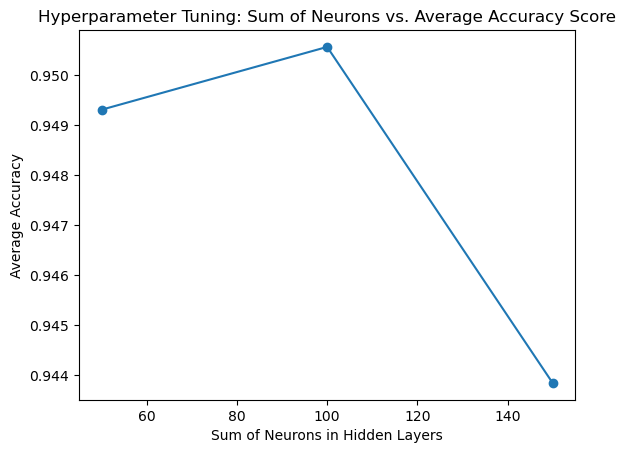

In [54]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import GridSearchCV
import numpy as np
import matplotlib.pyplot as plt

# Load the UMAP-reduced dataset
bc_data_umap_reduced = pd.read_csv('D:\\CS Classes at GT\\CS 7641 - ML\\ASSIGNMENT - 3\\Breast_Cancer_UMAP_Reduced.csv')

# Feature Scaling
scaler = StandardScaler()
X_scaled = scaler.fit_transform(bc_data_umap_reduced.drop('diagnosis', axis=1))

# Splitting the dataset into training and testing sets
y = bc_data_umap_reduced['diagnosis']
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)

# Define a range of hyperparameters for the grid search
param_grid = {
    'hidden_layer_sizes': [(50,), (100,), (50, 50), (100, 50)],
    'activation': ['tanh', 'relu'],
    'learning_rate_init': [0.001, 0.01, 0.1],
}

# Initialize the MLPClassifier
mlp = MLPClassifier(max_iter=1000, random_state=42)

# Perform Grid Search
grid_search = GridSearchCV(estimator=mlp, param_grid=param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

# Print the best parameters
print("Best parameters found: ", grid_search.best_params_)

# Plotting the hyperparameter tuning results
size_representation = [sum(size) if isinstance(size, tuple) else size for size in param_grid['hidden_layer_sizes']]
size_to_score = {sum(size): [] for size in param_grid['hidden_layer_sizes']}
for i, params in enumerate(grid_search.cv_results_['params']):
    size_sum = sum(params['hidden_layer_sizes']) if isinstance(params['hidden_layer_sizes'], tuple) else params['hidden_layer_sizes']
    size_to_score[size_sum].append(grid_search.cv_results_['mean_test_score'][i])
for size_sum in size_to_score:
    size_to_score[size_sum] = np.mean(size_to_score[size_sum])
sorted_size_representation = sorted(size_to_score.keys())
sorted_scores = [size_to_score[size] for size in sorted_size_representation]

# Plotting the results
plt.plot(sorted_size_representation, sorted_scores, 'o-')
plt.xlabel('Sum of Neurons in Hidden Layers')
plt.ylabel('Average Accuracy')
plt.title('Hyperparameter Tuning: Sum of Neurons vs. Average Accuracy Score')
plt.show()


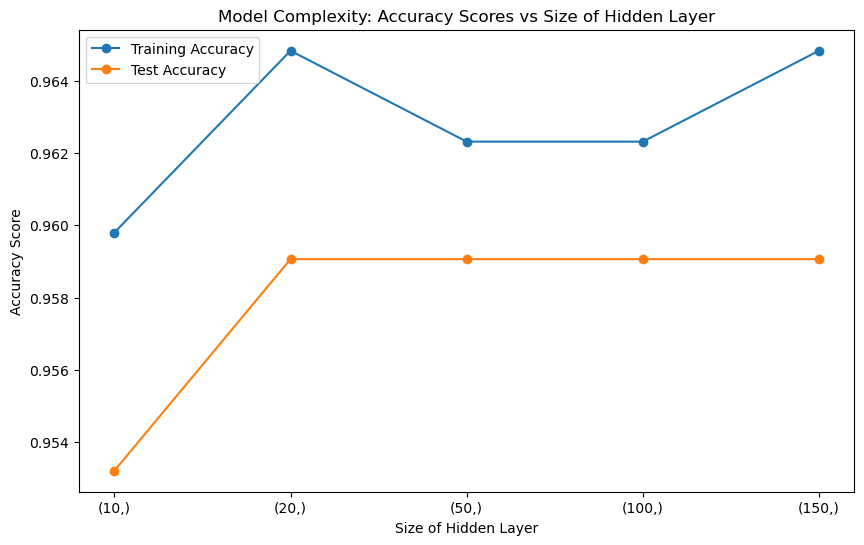

In [56]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

# Load the UMAP-reduced dataset
bc_data_umap_reduced = pd.read_csv('D:\\CS Classes at GT\\CS 7641 - ML\\ASSIGNMENT - 3\\Breast_Cancer_UMAP_Reduced.csv')

X = bc_data_umap_reduced.drop('diagnosis', axis=1)
y = bc_data_umap_reduced['diagnosis']

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)

hidden_layer_sizes = [(10,), (20,), (50,), (100,), (150,)]
train_scores = []
test_scores = []

# Adjust optimal hyperparameters to exclude 'hidden_layer_sizes'
optimal_hyperparams = {'activation': 'tanh', 'learning_rate_init': 0.001}

for size in hidden_layer_sizes:
    # Now, hidden_layer_sizes is only specified here
    mlp = MLPClassifier(hidden_layer_sizes=size, max_iter=1000, random_state=42, **optimal_hyperparams)
    mlp.fit(X_train, y_train)
    
    train_preds = mlp.predict(X_train)
    test_preds = mlp.predict(X_test)
    
    train_scores.append(accuracy_score(y_train, train_preds))
    test_scores.append(accuracy_score(y_test, test_preds))

plt.figure(figsize=(10, 6))
plt.plot([str(size) for size in hidden_layer_sizes], train_scores, 'o-', label='Training Accuracy')
plt.plot([str(size) for size in hidden_layer_sizes], test_scores, 'o-', label='Test Accuracy')
plt.xlabel('Size of Hidden Layer')
plt.ylabel('Accuracy Score')
plt.title('Model Complexity: Accuracy Scores vs Size of Hidden Layer')
plt.legend()
plt.show()


Iteration 100, Training Score: 0.9442815249266863, Validation Score: 0.9473684210526315
Iteration 200, Training Score: 0.9501466275659824, Validation Score: 0.9473684210526315
Iteration 300, Training Score: 0.9618768328445748, Validation Score: 0.9649122807017544


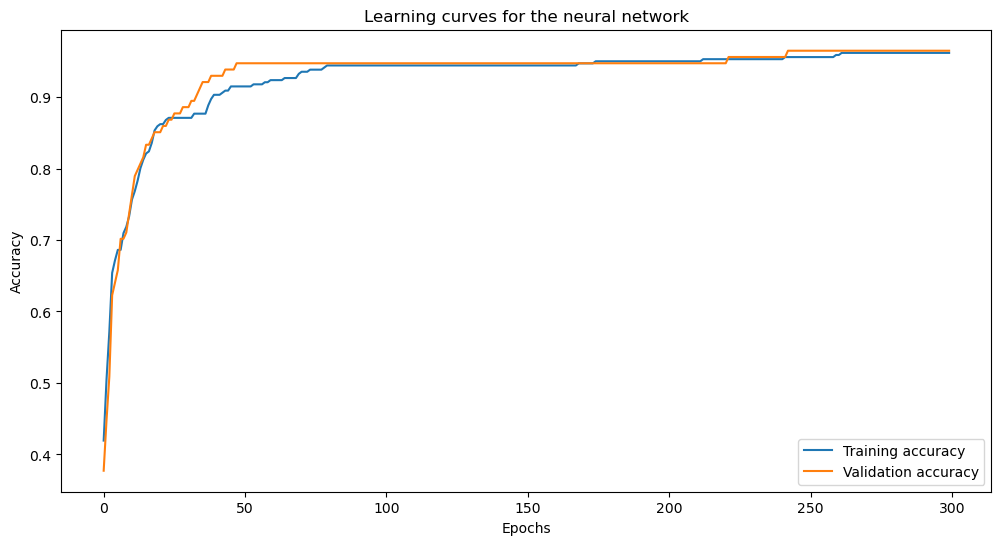

In [58]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPClassifier
import matplotlib.pyplot as plt

bc_data_umap_reduced = pd.read_csv('D:\\CS Classes at GT\\CS 7641 - ML\\ASSIGNMENT - 3\\Breast_Cancer_UMAP_Reduced.csv')

X = bc_data_umap_reduced.drop('diagnosis', axis=1)
y = bc_data_umap_reduced['diagnosis']

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split the dataset into training (60%), validation (20%), and testing sets (20%)
X_train, X_temp, y_train, y_temp = train_test_split(X_scaled, y, test_size=0.4, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

# Define the optimal hyperparameters
optimal_hyperparams = {
    'hidden_layer_sizes': (50,),
    'activation': 'tanh',
    'learning_rate_init': 0.001
}

# Initialize the MLPClassifier with the optimal hyperparameters
mlp = MLPClassifier(max_iter=300, random_state=42, **optimal_hyperparams)

# List to store the scores
train_scores, val_scores = [], []

# Fit the model and collect the scores for each iteration
for i in range(1, 301):
    mlp.partial_fit(X_train, y_train, classes=np.unique(y))
    train_scores.append(mlp.score(X_train, y_train))
    val_scores.append(mlp.score(X_val, y_val))
    
    # Print out the scores every 100 iterations
    if i % 100 == 0:
        print(f"Iteration {i}, Training Score: {train_scores[-1]}, Validation Score: {val_scores[-1]}")

# Plotting the learning curves
plt.figure(figsize=(12, 6))
plt.plot(train_scores, label='Training accuracy')
plt.plot(val_scores, label='Validation accuracy')
plt.title('Learning curves for the neural network')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()


In [59]:
import pandas as pd
import numpy as np
import time
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import StandardScaler

# Load your dataset here
bc_data_umap_reduced = pd.read_csv('D:\\CS Classes at GT\\CS 7641 - ML\\ASSIGNMENT - 3\\Breast_Cancer_UMAP_Reduced.csv')
X = bc_data_umap_reduced.drop('diagnosis', axis=1)
y = bc_data_umap_reduced['diagnosis'].values

# Feature Scaling
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Initialize lists for collecting data
training_sizes_line = []
training_times_line = []
testing_times_line = []

# Variables for collecting metrics at full training size
training_time_bar = None
testing_time_bar = None
accuracy_bar = None
precision_bar = None
recall_bar = None
f1_score_bar = None

# Define the best parameters from GridSearchCV or other hyperparameter tuning
best_params = {
      'hidden_layer_sizes': (50,),
    'activation': 'tanh',
    'learning_rate_init': 0.001
}

# Loop over training sizes from 10% to 90% in increments of 10%
for size in np.linspace(0.1, 0.9, 9):
    X_train_part, X_test_part, y_train_part, y_test_part = train_test_split(
        X_scaled, y, train_size=size, random_state=42
    )
    mlp = MLPClassifier(**best_params, random_state=42, max_iter=1000)
    
    # Training time
    start_time = time.perf_counter()
    mlp.fit(X_train_part, y_train_part)
    training_time = time.perf_counter() - start_time
    
    # Testing time (average over several runs for precision)
    start_time = time.perf_counter()
    for _ in range(10):  # Adjust as needed for precision
        y_pred = mlp.predict(X_test_part)
    testing_time = (time.perf_counter() - start_time) / 10
    
    training_sizes_line.append(size * 100)
    training_times_line.append(training_time)
    testing_times_line.append(testing_time)

# Full training size
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, train_size=None, random_state=42
)
mlp_full = MLPClassifier(**best_params, random_state=42, max_iter=1000)

# Training time
start_time = time.perf_counter()
mlp_full.fit(X_train, y_train)
training_time_bar = time.perf_counter() - start_time

# Testing time (average over several runs for precision)
start_time = time.perf_counter()
for _ in range(100):  # Adjust as needed for precision
    y_pred_full = mlp_full.predict(X_test)
testing_time_bar = (time.perf_counter() - start_time) / 100

# Calculate metrics
accuracy_bar = accuracy_score(y_test, y_pred_full)
precision_bar = precision_score(y_test, y_pred_full)
recall_bar = recall_score(y_test, y_pred_full)
f1_score_bar = f1_score(y_test, y_pred_full)

# Print metrics
print(f"Training Time (Full): {training_time_bar:.2f} seconds")
print(f"Testing Time (Full): {testing_time_bar:.2f} seconds")
print(f"Accuracy (Full): {accuracy_bar:.2f}")
print(f"Precision (Full): {precision_bar:.2f}")
print(f"Recall (Full): {recall_bar:.2f}")
print(f"F1 Score (Full): {f1_score_bar:.2f}")

# Create DataFrames
line_plot_df = pd.DataFrame({
    'Training Size (%)': training_sizes_line,
    'Training Time (s)': training_times_line,
    'Testing Time (s)': testing_times_line
})

bar_chart_df = pd.DataFrame({
    'Metric': ['Accuracy', 'Precision', 'Recall', 'F1 Score'],
    'Value': [accuracy_bar, precision_bar, recall_bar, f1_score_bar]
})

# Export to Excel
with pd.ExcelWriter('D:\\CS Classes at GT\\CS 7641 - ML\\ASSIGNMENT - 3\\mlp_performance_analysis-UMAP.xlsx') as writer:
    line_plot_df.to_excel(writer, sheet_name='Line Plots Data', index=False)
    bar_chart_df.to_excel(writer, sheet_name='Bar Chart Data', index=False)


Training Time (Full): 0.16 seconds
Testing Time (Full): 0.00 seconds
Accuracy (Full): 0.96
Precision (Full): 0.96
Recall (Full): 0.93
F1 Score (Full): 0.94
